<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/19.00-Construindo_Cenarios_e_Pop_Multi_350_parametros.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- O cenário de múltiplos do Pop350: redes sociais](18.00-Construindo_Cenarios_e_Pop_Multi_350_social.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [O cenário da cidade do Rio de Janeiro: rede residencial ->](20.00-Cenario_Rio_Residencias.ipynb)

---


# O cenário de múltiplos do Pop350: parâmetros

- Continuando a criação de cenários que sejam **múltiplos** do cenário `Pop350` visto anteriormente.

- Neste segundo caderno da série, ...

In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 10/Jun/2020


## Simulações

- No modelo, os parâmetros $\beta_r$, $\beta_e$ e $\beta_c$ são escolhidos para que os números básicos de reprodução de cada rede sejam iguais entre si, e, portanto, iguais a um terço do $\beta$ combinado.

- Essa escolha depende do fator de recuperação.

- O fator de recuperação do modelo original inclui uma função de decaimento do poder de infecção ao longo do tempo. Porém, não implementamos isso, continuamos com um fator $\gamma$ como nos modelos compartimentais.

- Baseado na escolha da função de decaimento, consideramos $\gamma = 0.15$. (conferir)

- Já a escolha dos parâmetros de transmissão depende muito da rede.

- Fazemos, a seguir, uma série de simulações para determinar esses parâmetros.

- Em cada simulação, escolhemos apenas um desses parâmetros como sendo não nulo, de modo a buscar perfis semelhantes nos diversos casos.

### Cenário

Todas as simulações são feitas com o cenário `episiming.cenarios.Multi350(1,2,2)`, de 1400 indivíduos.


In [5]:
cenario_4x350 = episiming.cenarios.Multi350(1,2,2)
print(f'População: {cenario_4x350.num_pop}')

População: 1400


### Dados temporais

In [6]:
num_sim = 10
dt = 1 # passo de tempo
t_0 = 0 # instante initial
num_dt = 80 # inst
dados_temporais = [t_0, dt, num_dt]

### Primeiro grupo de simulações com apenas um parâmetro não nulo

#### Simulações com apenas um parâmetro não nulo

In [7]:
%%time
cenario_4x350.inicializa_infeccao(20, 0.24, 0.0, 0.00, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

CPU times: user 9.03 s, sys: 187 ms, total: 9.22 s
Wall time: 9.75 s


array([20. , 20.2, 20. , 20. , 19. , 18.1, 17.2, 15.9, 15.1, 14.2, 13.7,
       12.4, 11.6, 10.7,  9.2,  8.5,  7.6,  6.8,  6.9,  6.5])

In [8]:
cenario_4x350.inicializa_infeccao(20, 0.0, 0.22, 0.00, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

array([20. , 19.2, 19.5, 18.3, 18.2, 18.7, 18.8, 17.9, 18.4, 17.9, 17.3,
       16.9, 15.5, 14.2, 13.7, 14.1, 13.8, 12.7, 12.2, 12.6])

In [9]:
cenario_4x350.inicializa_infeccao(20, 0.0, 0.0, 0.1, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

array([20. , 18.7, 19.5, 17.8, 16.9, 16.8, 15.7, 16.7, 15.6, 15.9, 15.7,
       15. , 14.5, 14. , 13.4, 12.2, 12.3, 12. , 11. ,  9.9])

#### Simulação com todos esses parâmetros

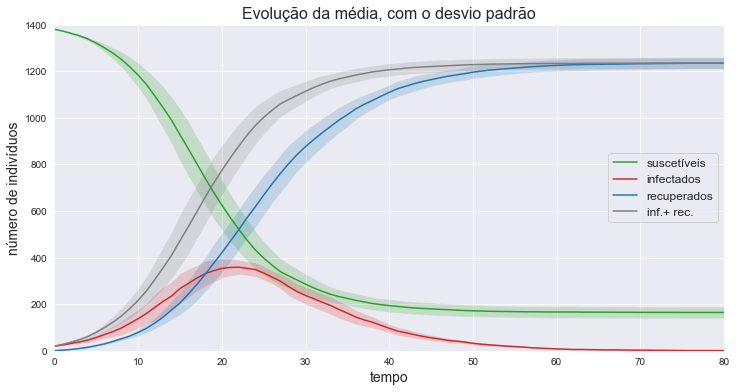

array([ 20. ,  24.8,  31.7,  38.1,  46.2,  57.2,  70.1,  82.4,  97.7,
       117.7, 137.6, 160.4, 186.9, 212.4, 235.1, 267.4, 289.4, 311.9,
       331. , 343.6])

In [10]:
cenario_4x350.inicializa_infeccao(20, 0.24, 0.22, 0.15, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim, show='sd')
X_4x350.I_medio[:20]

### Segundo grupo de simulações com apenas um parâmetro não nulo

In [11]:
%%time
cenario_4x350.inicializa_infeccao(20, 0.6, 0.0, 0.0, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

CPU times: user 665 ms, sys: 9.82 ms, total: 675 ms
Wall time: 695 ms


array([20. , 23.4, 27.4, 27.2, 27.6, 28.5, 27.5, 25.6, 23.7, 21.9, 19.1,
       17.6, 14.9, 13.6, 11.7, 10.7,  8.9,  7.3,  6. ,  5.6])

In [12]:
%%time
cenario_4x350.inicializa_infeccao(20, 0.0, 0.4, 0.0, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

CPU times: user 904 ms, sys: 16 ms, total: 920 ms
Wall time: 975 ms


array([20. , 21.1, 24. , 25.6, 27.7, 28.3, 29.4, 28.9, 30.5, 31.2, 32.5,
       34.8, 35.4, 35. , 33.5, 31.5, 29.8, 28.4, 24.7, 23.7])

In [13]:
%%time
cenario_4x350.inicializa_infeccao(20, 0.0, 0.0, 0.185, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim)
X_4x350.I_medio[:20]

CPU times: user 2.41 s, sys: 36.5 ms, total: 2.45 s
Wall time: 2.55 s


array([20. , 21.5, 22.1, 23.4, 22.6, 23.8, 25. , 25.1, 26.5, 27.4, 27.6,
       27.7, 29.7, 31.1, 30.4, 31.8, 32. , 33.9, 35.3, 37.8])

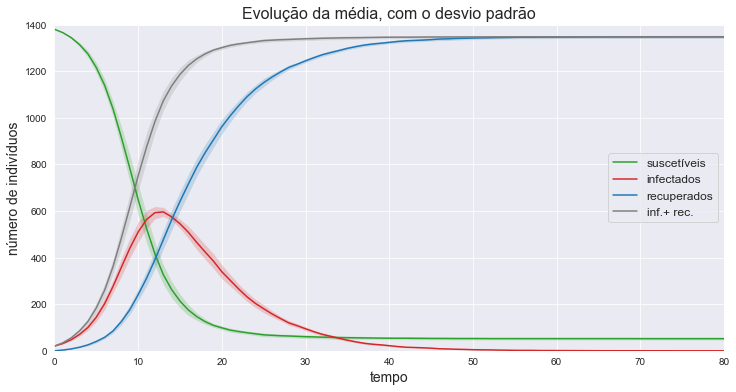

CPU times: user 2.67 s, sys: 44.5 ms, total: 2.71 s
Wall time: 2.81 s


array([ 20. ,  31.2,  47.6,  70.4, 100.2, 144.2, 202.7, 276.4, 358.9,
       439.7, 510. , 563.3, 592.8, 596.3, 575. , 545.2, 508.7, 465.2,
       424.4, 384.9])

In [14]:
%%time
cenario_4x350.inicializa_infeccao(20, 0.6, 0.4, 0.185, 0.15)
X_4x350 = cenario_4x350.evolui_jit(dados_temporais, num_sim, show='sd')
X_4x350.I_medio[:20]

<!--NAVIGATOR-->

---
[<- O cenário de múltiplos do Pop350: redes sociais](18.00-Construindo_Cenarios_e_Pop_Multi_350_social.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [O cenário da cidade do Rio de Janeiro: rede residencial ->](20.00-Cenario_Rio_Residencias.ipynb)